In [320]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [321]:
import torch
from pathlib import Path
import numpy as np
from lib.open_set.load_emb import load_embeddings


EEGNet embeddings

In [322]:
path = Path("/Users/hrakol/projects/diploma_thesis/data/embeddings")

In [323]:
load_path = path / ("train_embeddings.pt")
train = load_embeddings(load_path)
load_path = path / ("val_embeddings.pt")
val = load_embeddings(load_path)
load_path = path / ("test_embeddings.pt")
test = load_embeddings(load_path)
load_path = path / ("impostor_embeddings.pt")
imp = load_embeddings(load_path)

In [324]:
import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(train[0])


/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



array([[ 3.90050673e+00,  2.93156832e-01],
       [ 3.81773901e+00, -5.71629882e-01],
       [ 3.86765170e+00,  2.33133227e-01],
       [ 4.26398516e+00, -1.19010173e-01],
       [ 3.40793133e+00,  3.87673900e-02],
       [ 4.15018702e+00, -1.84567589e-02],
       [ 4.03530550e+00, -4.93934095e-01],
       [ 3.98239279e+00,  6.83455681e-03],
       [ 4.11579323e+00,  2.35323414e-01],
       [ 2.57165074e+00, -3.15343916e-01],
       [ 4.05576611e+00,  1.00798301e-01],
       [ 4.30467033e+00,  6.86043575e-02],
       [ 4.42995548e+00, -1.93127641e-03],
       [ 3.68220687e+00, -8.69989302e-03],
       [ 3.79109788e+00,  4.44221854e-01],
       [ 3.14788795e+00,  1.80862471e-02],
       [-3.47133780e+00, -8.38543594e-01],
       [ 3.60209131e+00, -1.70039400e-01],
       [ 4.13576174e+00, -4.15149182e-01],
       [ 4.03134394e+00, -1.23693275e+00],
       [ 3.57564020e+00, -3.85259330e-01],
       [ 3.95316243e+00, -7.68812776e-01],
       [ 4.15800238e+00, -3.25611621e-01],
       [ 3.

In [325]:
all_emb = torch.cat([train[0], val[0], test[0], imp[0]], dim = 0)
all_users = np.concatenate([train[1], val[1], test[1], imp[1]], axis = 0)
all_sessions = np.concatenate([train[2], val[2], test[2], imp[2]], axis = 0)

In [326]:
emb_u = umap_model.transform(all_emb)
unique_sessions = np.unique(all_sessions)


/var/folders/py/jsk87j5502701w8fqb_j26l40000gn/T/ipykernel_50240/771449898.py:14: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/var/folders/py/jsk87j5502701w8fqb_j26l40000gn/T/ipykernel_50240/771449898.py:21: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



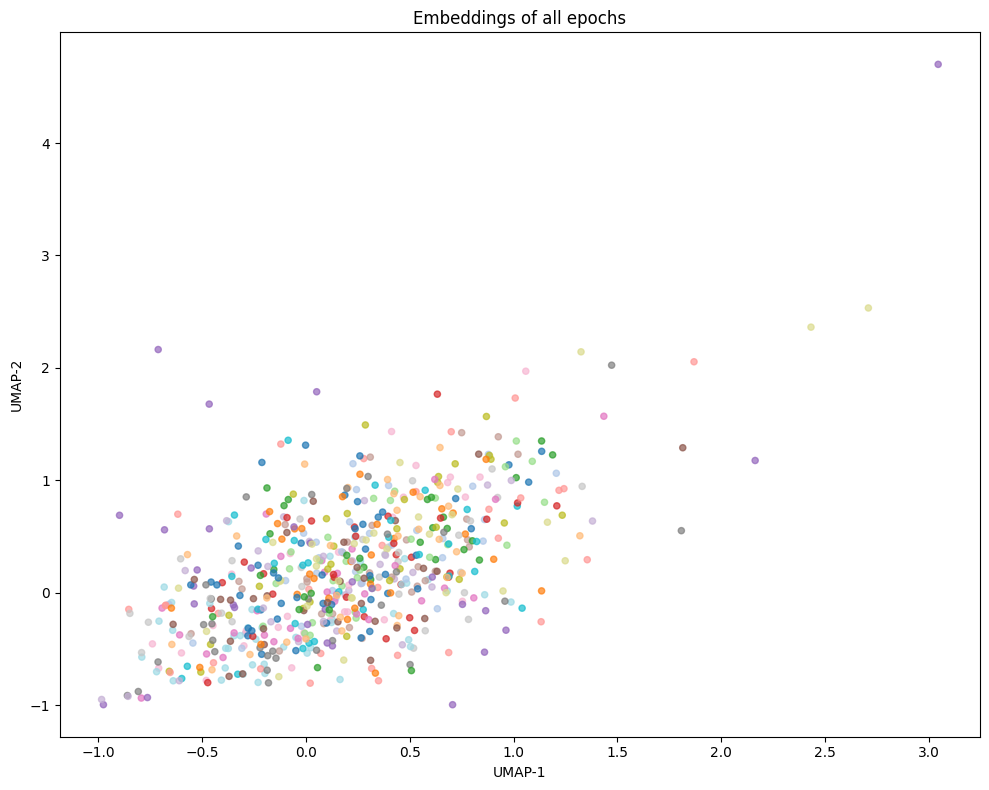

In [327]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab20", len(unique_sessions))

session_to_color = {
    s: cmap(i)
    for i, s in enumerate(unique_sessions)
}

colors = [session_to_color[s] for s in all_sessions]

plt.figure(figsize=(10, 8))

sc = plt.scatter(
    all_emb[:, 0], all_emb[:, 1],
    c = colors,
    cmap = "tab20",
    s = 20,
    alpha = 0.7
)
plt.legend(frameon=False)
plt.title("Embeddings of all epochs")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

In [328]:
from lib.open_set.aggregate import aggregate_by_session

In [329]:
emb_train_ses, y_train_ses, train_grp = aggregate_by_session(train[0], train[1], train[2])    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session(val[0], val[1], val[2])
emb_test_ses, y_test_ses, test_grp = aggregate_by_session(test[0], test[1], test[2])
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session(imp[0], imp[1], imp[2])

In [330]:
group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

In [331]:
all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

In [332]:
import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



array([[ 5.5335035, 14.77253  ],
       [ 5.6492743, 15.426986 ],
       [ 4.337776 , 13.106793 ],
       [ 4.9456563, 13.047421 ],
       [ 4.7785907, 13.800389 ],
       [ 4.349344 , 14.353436 ],
       [ 6.1398973, 15.239999 ],
       [ 6.0628824, 14.530421 ],
       [ 3.7062094, 13.398918 ],
       [ 3.5329492, 14.520424 ],
       [ 3.3942127, 13.781884 ],
       [ 3.6453555, 12.636889 ],
       [ 3.0786269, 13.118495 ],
       [ 2.7777443, 14.096961 ]], dtype=float32)

In [333]:
emb_u = umap_model.transform(all_emb)

In [334]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggragated",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()


In [335]:
from lib.utils.stimuli_labels import load_stim, select_seq, arrange_stim
import pandas as pd

stim_path = Path("/Users/hrakol/projects/diploma_thesis/data/stimuli_sequence")
split_path = Path("/Users/hrakol/projects/diploma_thesis/data/processed/split.csv")

stim_seq = load_stim(stim_path)
split_df = pd.read_csv(split_path)

In [336]:
stim_seq_train = select_seq(stim_seq, split_df, "train")
train_freq = arrange_stim(stim_seq_train, train_grp)

stim_seq_val = select_seq(stim_seq, split_df, "val")
val_freq = arrange_stim(stim_seq_val, val_grp)

stim_seq_test = select_seq(stim_seq, split_df, "test")
test_freq = arrange_stim(stim_seq_test, test_grp)

stim_seq_imp = select_seq(stim_seq, split_df, "impostor")
imp_freq = arrange_stim(stim_seq_imp, imp_grp)

In [337]:
from lib.open_set.aggregate import aggregate_by_session_per_freq
freq = 0

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train[0], train[1], train[2], train_freq, freq)        
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val[0], val[1], val[2], val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test[0], test[1], test[2], test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp[0], imp[1], imp[2], imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=500 Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [338]:
from lib.open_set.aggregate import aggregate_by_session_per_freq
freq = 1

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train[0], train[1], train[2], train_freq, freq)        
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val[0], val[1], val[2], val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test[0], test[1], test[2], test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp[0], imp[1], imp[2], imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=2000 Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()


/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [339]:
from lib.open_set.aggregate import aggregate_by_session_per_freq
freq = 2

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train[0], train[1], train[2], train_freq, freq)        
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val[0], val[1], val[2], val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test[0], test[1], test[2], test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp[0], imp[1], imp[2], imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=4000 Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()


/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



XGBOOST CLOSED SET

In [340]:
from lib.utils.stimuli_labels import load_stim, select_seq, arrange_stim
import pandas as pd
from lib.open_set.z_score import z_score
from lib.train.dataset import load_dataset

stim_path = Path("/Users/hrakol/projects/diploma_thesis/data/stimuli_sequence")
split_path = Path("/Users/hrakol/projects/diploma_thesis/data/processed/split.csv")

stim_seq = load_stim(stim_path)
split_df = pd.read_csv(split_path)

stim_seq_train = select_seq(stim_seq, split_df, "train")
train_freq = arrange_stim(stim_seq_train, train_grp)

stim_seq_val = select_seq(stim_seq, split_df, "val")
val_freq = arrange_stim(stim_seq_val, val_grp)

stim_seq_test = select_seq(stim_seq, split_df, "test")
test_freq = arrange_stim(stim_seq_test, test_grp)

stim_seq_imp = select_seq(stim_seq, split_df, "impostor")
imp_freq = arrange_stim(stim_seq_imp, imp_grp)

In [341]:
feature_path = Path("/Users/hrakol/projects/diploma_thesis/data/features")
model_type = "xgboost"

In [342]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

In [343]:
emb_train_ses, y_train_ses, train_grp = aggregate_by_session(train_emb, train_y, train_grp)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session(val_emb, val_y, val_grp)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session(test_emb, test_y, test_grp)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session(imp_emb, imp_y, imp_grp)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [344]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

freq = 0

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train_emb, train_y, train_grp, train_freq, freq)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val_emb, val_y, val_grp, val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test_emb, test_y, test_grp, test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp_emb, imp_y, imp_grp, imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=500Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [345]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

freq = 1

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train_emb, train_y, train_grp, train_freq, freq)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val_emb, val_y, val_grp, val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test_emb, test_y, test_grp, test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp_emb, imp_y, imp_grp, imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=2000Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [346]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

freq = 2

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train_emb, train_y, train_grp, train_freq, freq)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val_emb, val_y, val_grp, val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test_emb, test_y, test_grp, test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp_emb, imp_y, imp_grp, imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = all_emb[:, 0], 
        y = all_emb[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=4000Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/projects/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

